In [2]:
#============================================================================
# Bibliotecas necessárias
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#============================================================================
# Função para cálculo das funções base
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def BasisFuncL(x): # Elementos Lineares
    Phi = [(1.0 - x)/2, (x + 1.0)/2]
    GradPhi = [-0.5, 0.5]
    return [Phi, GradPhi]

def BasisFuncQ(x): # Elementos Quadráticos
    Phi = [(x - 1.0)*x/2, (x + 1.0)*x/2, -(x + 1.0)*(x - 1.0)]
    GradPhi = [x - 0.5, x + 0.5, -2*x]
    return [Phi, GradPhi]

#============================================================================
# Função Mapeamento Local / Global
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def GlobalPointer(Nele): # Matriz de mapeamento com 2 nós por elemento
    nnodes = Nele + 1
    DomNodeID = np.zeros((Nele, 2), dtype=int)
    
    for i in range(Nele):
        DomNodeID[i, 0] = i 
        DomNodeID[i, 1] = i + 1
    
    return [nnodes, DomNodeID]

def GlobalPointer(Nele): # Matriz de mapeamento com 3 nós por elemento
    nnodes = 2*Nele + 1
    DomNodeID = np.zeros((Nele, 2), dtype=int)
    
    for i in range(Nele):
        DomNodeID[i, 0] = i 
        DomNodeID[i, 1] = i + 1
    
    return [nnodes, DomNodeID]

In [4]:
#============================================================================
# Função para cálculo da malha problema 1D
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def Mesh(L, nnodes, Nele, DomNodeID):
    x = np.zeros(nnodes)
    dx = np.zeros(Nele)
    
    for i in range(nnodes):
        x[i] = L*(i/(nnodes - 1))
        
    # cálculo do comprimento dos elementos
    
    for iele in range(Nele):
        dx[iele] = x[DomNodeID[iele, 1]] - x[DomNodeID[iele, 0]]
        
    return [x, dx]

In [5]:
#============================================================================
# Função para cálculo da matriz e vetor elementar
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def GetElemAb(iele, Nele, Pe, dx):
    
    nlocalnodes = 2
    ngp = 2
    
    XIGP = [-0.57735, 0.57735]
    WGP = [1.0, 1.0]
    
    A_elem = np.zeros((nlocalnodes, nlocalnodes))
    b_elem = np.zeros(nlocalnodes)

    for igp in range(ngp):
        XI = XIGP[igp]
        W = WGP[igp]
        
        [Phi, GradPhi] = BasisFunc(XI)
        
        for ilnode in range(nlocalnodes):
            for jlnode in range(nlocalnodes):
                A_elem[ilnode, jlnode] += W*(GradPhi[ilnode] * GradPhi[jlnode] * 2/dx + 
                Pe*Phi[ilnode]*GradPhi[jlnode])
            b_elem[ilnode] = 0
        
    if (iele == 0):
        A_elem[0,0] += 1.0
        b_elem[0] = 1.0
    elif (iele == Nele - 1):
        A_elem[1, 0] = 0.0
        A_elem[1, 1] = 1.0
    
    return [A_elem, b_elem]

In [6]:
#============================================================================
# Função para solução pelo método de Elementos Finitos
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def Solution(Pe, nnodes, Nele, DomNodeID, dx):
    
    A = np.zeros((nnodes, nnodes))
    b = np.zeros(nnodes)
    
    for iele in range(Nele):
        
        #Calcula a Matriz Elementar
        [A_elem, b_elem] = GetElemAb(iele, Nele, Pe, dx[iele])
        
        nlocalnodes = 2
        for ilnode in range(nlocalnodes):
            ignode = DomNodeID[iele, ilnode]
            
            for jlnode in range(nlocalnodes):
                jgnode = DomNodeID[iele, jlnode]
                A[ignode, jgnode] += A_elem[ilnode, jlnode]
            
            b[ignode] += b_elem[ilnode]
    
    A_inv = np.linalg.inv(A)
    U = np.dot(A_inv, b)
    
    return U

In [7]:
#============================================================================
# Função para cálculo da solução exata
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

def Exata(Pe, x):
    
    N = 100
    xex = np.linspace(min(x), max(x), N)
    
    Uex = np.zeros(N)
    
    for i in range(N):
        Uex[i] = (math.exp(Pe*xex[i])-math.exp(Pe))/(1-Pe-math.exp(Pe))
    
    return [xex, Uex]

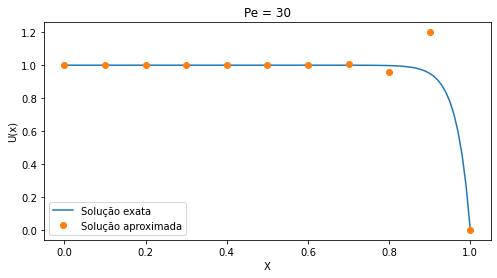

In [22]:
#============================================================================
# Código Baseado no Método de Elementos Finitos - problema 1D
# Data: Setembro de 2022
# Autores: Márcio Carvalho, Juliana Valerio, Aline Amaral Abdu e Átila Luna
#============================================================================

# PRÉ-PROCESSAMENTO

Pe = 30
L  = 1
Nele = 10

# Calcula número de nós e DomNodeID
[nnodes, DomNodeID] = GlobalPointer(Nele)

# Geração de Malha
[x, dx] = Mesh(L, nnodes, Nele, DomNodeID)

#=======================================================================
# RESOLUÇÃO DO PROBLEMA
# Vetor com a solução aproximada

U = Solution(Pe, nnodes, Nele, DomNodeID, dx)

#=======================================================================
# PÓS-PROCESSAMENTO
# Vetor com a solução exata

[xex, Uex] = Exata(Pe,x)

#=======================================================================
# Plot dos gráficos

plt.figure(figsize=(8, 4))
plt.ylabel('U(x)')
plt.xlabel('X')
plt.title('Pe = '+ str(Pe))

plt.plot(xex, Uex, label = 'Solução exata')
plt.plot(x, U, 'o', label = 'Solução aproximada')

plt.legend(loc='lower left')

plt.show()